In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table
from tqdm import tqdm
from astropy import units as un

from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7) 
# from halotools.empirical_models import NFWProfile

# import halotools
# Gala
import gala.potential as gp
from gala.units import galactic

from galpy.potential import MWPotential2014
from galpy.potential import evaluateDensities
from galpy.util import conversion


In [2]:
# nfw = NFWProfile()
# # nfw = NFWProfile(conc_mass_model='dutton_maccio14')

# Npts = 100
# radius = np.logspace(-2, 0, Npts)
# mass = np.zeros(Npts) + 1e12
# conc = 5
# result = nfw.mass_density(radius, mass, conc)
# # print(result)
# concarr = np.linspace(1, 100, Npts) # concentration array
# result_conc = nfw.mass_density(radius, mass, concarr)
# # print(result_conc)




In [85]:

halo = gp.NFWPotential(m=6E11*un.Msun, r_s=10*un.kpc, units=galactic)
halo2 = gp.NFWPotential(m=6E11*un.Msun, r_s=.8*un.kpc, units=galactic)

halpy = halo.to_galpy_potential()
halpy2 = halo2.to_galpy_potential()

x = np.logspace(-3, 1.1, 256)
xyz = np.zeros((3, len(x)))
xyz[0] = x
density = halo.density(xyz)
print(halo.to_sympy())



(-G*m*log(1 + sqrt(z**2/c**2 + y**2/b**2 + x**2/a**2)/r_s)/sqrt(z**2/c**2 + y**2/b**2 + x**2/a**2), {'x': x, 'y': y, 'z': z}, {'m': m, 'r_s': r_s, 'a': a, 'b': b, 'c': c, 'G': G})


In [86]:
densmw = [] # evaluateDensities(MWPotential2014,1.,0.)*conversion.dens_in_msolpc3(220.,8.)
densmw0, densmw1, densmw2, densNFW, densNFW2 = [], [], [], [], []
for i in range(len(x)):
    r = x[i]
    vel_r = halpy.vcirc(r)
    # densmw.append(evaluateDensities(MWPotential2014,r, 0.)*conversion.dens_in_msolpc3(vel_r,r))
    densmw0.append(MWPotential2014[0].dens(r, 0.))
    densmw1.append(MWPotential2014[1].dens(r, 0.))
    densmw2.append(MWPotential2014[2].dens(r, 0.))
    densmw.append(evaluateDensities(MWPotential2014,r, 0.))
    densNFW.append(halpy.dens(r, 0).value)
    densNFW2.append(halpy2.dens(r, 0).value)
# conversion.get_physical()

In [74]:
print(MWPotential2014[1].dens(15, 0.))
print(halpy.dens(15, 0.))

0.00019118557611122965
2.428511704893422e-05 solMass / pc3


Text(0, 0.5, 'mass density ($M_{sol}/{\\rm pc}^{3}$)')

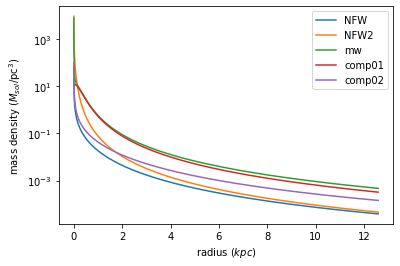

In [87]:
# plt.loglog(radius, result)
# print(densNFW[0].unit)
plt.semilogy(x, densNFW, label = 'NFW') # semilogx
plt.semilogy(x, densNFW2, label = 'NFW2') # semilogx

plt.semilogy(x, densmw, label = 'mw')
# plt.semilogy(x, densmw0, label = 'comp00')
plt.semilogy(x, densmw1, label = 'comp01')
plt.semilogy(x, densmw2, label = 'comp02')
plt.legend()
plt.xlabel(r'radius ($kpc$)')
plt.ylabel(r'mass density ($M_{sol}/{\rm pc}^{3}$)')

Text(0, 0.5, 'mass density ($h^{3}/{\\rm Mpc}^{3}$)')

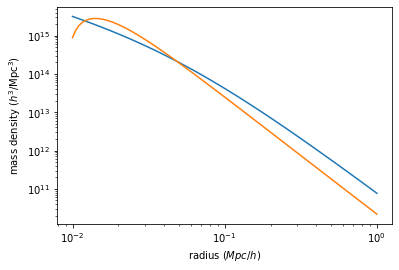

In [ ]:
# plt.loglog(radius, result)
# plt.loglog(radius, result_conc)
# plt.xlabel(r'radius ($Mpc/h$)')
# plt.ylabel(r'mass density ($h^{3}/{\rm Mpc}^{3}$)')

references:

https://arxiv.org/pdf/1307.8241.pdf
https://arxiv.org/pdf/1110.4431.pdf